##Introduction

###The Brain Cancer Gene Expression - CuMiDa GSE50161 Microarray Experiment dataset is derived from a study that investigates gene expression patterns related to brain cancer. The dataset originates from the Gene Expression Omnibus (GEO) repository and is a part of the CuMiDa (Curated Microarray Database) collection. The experiment focuses on identifying key gene expression differences between normal and cancerous brain tissues using microarray technology.

##Dataset Overview:
###The GSE50161 dataset contains samples representing different brain cancer subtypes, with each sample characterized by high-dimensional gene expression data. These measurements reflect the activity levels of thousands of genes across various samples. The primary goal is to uncover gene expression patterns that can help in classifying and distinguishing between healthy and cancerous states.

##Key Features:
* Gene Expression Values: Each column represents the expression level of a specific gene, quantified from microarray experiments.
* Sample Labels: The dataset includes labels that identify whether a sample corresponds to a brain cancer subtype or a control (healthy) tissue.
* Dimensionality: The dataset is high-dimensional, making it ideal for dimensionality reduction techniques like t-SNE (t-Distributed Stochastic Neighbor Embedding), which helps visualize clusters of similar gene expression profiles.

##Research Significance:
###Understanding gene expression differences in brain cancer is critical for improving diagnostics, discovering therapeutic targets, and advancing personalized medicine. By applying machine learning and dimensionality reduction techniques, researchers can uncover hidden patterns and gain insights into the molecular mechanisms underlying brain cancer.

###This dataset is particularly suited for applications in gene expression analysis, feature selection, classification tasks, and visualization of complex biological data. In this project, we'll explore t-SNE to visualize and interpret the clusters formed by gene expression data, offering a deeper understanding of the relationships between different samples.

Source: https://www.kaggle.com/datasets/brunogrisci/brain-cancer-gene-expression-cumida/data

In [1]:
!pip install bioinfokit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59220 sha256=8efe089a048e0984f9be00044cca5abd583155761f3d0043e8ea94a96e6d3a2e
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


#Importing Necessary Libraries

In [2]:
import pandas as pd # Pandas is a powerful library for data manipulation and analysis.
import numpy as np # NumPy is a powerful tool for numerical computations in Python

from sklearn.manifold import TSNE #Imports the TSNE class from sklearn.manifold for dimensionality reduction.
from bioinfokit.visuz import cluster #The cluster module from bioinfokit.visuz for visualizing clustering results.

#Loading the Dataset

In [3]:
df = pd.read_csv('Brain_GSE50161.csv') #The df = pd.read_csv line reads a CSV file into a DataFrame named df using the pandas library.

In [4]:
df.head() #We will now read the data from a CSV file into a Pandas DataFrame Let us have a look at how our dataset looks like using df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [5]:
df.shape # Displays the total count of the Rows and Columns respectively.

(130, 54677)

In [6]:
df.isnull().sum() #Is used to display the dimensions of the DataFrame df. Giving you a quick overview of the size of your dataset.

,0
samples,0
type,0
1007_s_at,0
1053_at,0
117_at,0
...,...
AFFX-ThrX-5_at,0
AFFX-ThrX-M_at,0
AFFX-TrpnX-3_at,0
AFFX-TrpnX-5_at,0


###There is no null or missing value in the dataset.

In [7]:
df.info() #Displays the total count of values present in the particular column along with the null count and data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 54.2+ MB


In [8]:
df[df.duplicated()] #This code returns the count of duplicate rows in the DataFrame df.

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at


In [9]:
# Check the data types of each column
print(df.dtypes)

samples              int64
type                object
1007_s_at          float64
1053_at            float64
117_at             float64
                    ...   
AFFX-ThrX-5_at     float64
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
Length: 54677, dtype: object


In [10]:
from sklearn.preprocessing import LabelEncoder #This class is used to convert categorical data (like strings) into numerical labels.

# Apply Label Encoding to each categorical column
for col in df.select_dtypes(include=[object]).columns: #Iterates through each column in the DataFrame df that contains categorical data (identified by the object data type).
    le = LabelEncoder() #Creates an instance of the LabelEncoder for each categorical column.
    df[col] = le.fit_transform(df[col])

###le.fit_transform(): Fits the encoder to the unique categories in the column (fit) and then transforms the categorical values into numerical labels (transform). The transformed numerical labels replace the original categorical values in the DataFrame.

###Purpose:

###Many machine learning algorithms require numerical input data. Label Encoding is a simple technique to convert categorical features into a numerical format that these algorithms can understand. It assigns a unique numerical label (starting from 0) to each category within a feature.

In [11]:
from sklearn.preprocessing import StandardScaler  #Data Scaling
from sklearn.decomposition import PCA #Dimensionality Reduction
from sklearn.manifold import TSNE #Visualization
import matplotlib.pyplot as plt #Plotting

##Preprocessing

In [12]:
df_numeric = df.select_dtypes(include=[float, int])
#This line selects only the columns in your DataFrame df that contain numerical data (either floating-point numbers or integers).
#This creates a new DataFrame df_numeric with just the numerical features.

scaler = StandardScaler()
#This initializes a StandardScaler object from scikit-learn. This scaler standardizes features by removing the mean and scaling to unit variance.

X_scaled = scaler.fit_transform(df_numeric)
#This line does two things:
#fit: Calculates the mean and standard deviation for each numerical feature in df_numeric.
#transform: Applies the standardization by subtracting the mean and dividing by the standard deviation for each feature, resulting in a scaled dataset X_scaled.

##Purpose and Influence:
###Importance of Scaling: Many machine learning algorithms (especially those based on distance calculations like k-NN, SVM, or those using gradient descent) perform better when numerical features are on a similar scale.
###Influence on Dataset: Feature scaling prevents features with larger ranges from dominating the learning process. It ensures that all features contribute equally to the model training, leading to potentially better model performance and faster convergence.

In [13]:
pca = PCA(n_components=50)
#Initializes a PCA object from scikit-learn, setting the number of components (dimensions) to keep after reduction to 50.
X_pca = pca.fit_transform(X_scaled)
#fit: Learns the principal components from the scaled data X_scaled.
#transform: Projects the scaled data onto the first 50 principal components, reducing the dimensionality of the data to 50 features.

##Purpose and Influence:
###Purpose of PCA: PCA is used to reduce the number of features in a dataset while retaining as much of the original variance as possible. This can help with:
* Speeding up model training.
* Reducing noise and overfitting.
* Visualizing high-dimensional data in lower dimensions.

###Influence on Dataset: PCA transforms the original features into a new set of uncorrelated features (principal components) that capture the most important patterns in the data. The dataset is now represented in a lower-dimensional space, which can be easier to analyze and visualize.
###In the t-SNE analysis, applying PCA beforehand can potentially improve the results by:

* Removing noise: PCA can filter out less important variations in the data.
* Speeding up t-SNE: t-SNE is computationally expensive for high-dimensional data, so reducing dimensionality with PCA first can make it more efficient

In [14]:
# t-SNE Modeling
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)  #Initializes a t-SNE object:
X_tsne = tsne.fit_transform(X_pca)

###1. tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42): Initializes a t-SNE object:
* n_components=2: Specifies that the data should be reduced to 2 dimensions for visualization.
* perplexity=30: Controls the local neighborhood size considered when computing similarities between data points.
* n_iter=1000: Sets the number of iterations for the optimization process.
* random_state=42: Ensures reproducibility of the results.

###2. X_tsne = tsne.fit_transform(X_pca):
* fit_transform: Applies t-SNE to the data X_pca (which was likely obtained after PCA), reducing it to 2 dimensions and storing the result in X_tsne.

###Purpose and Influence:

* Purpose of t-SNE: t-SNE is a non-linear dimensionality reduction technique primarily used for visualization of high-dimensional data. It aims to preserve the local structure of the data, meaning that points close to each other in the original high-dimensional space will also be close in the low-dimensional representation.

* Influence on Dataset: t-SNE transforms the data into a 2D representation where you can visually explore clusters and patterns. It does not directly change the original dataset but provides a new way to visualize and understand the relationships between data points.

###In the analysis, t-SNE helps you visualize how the breast cancer gene expression samples cluster in a 2D space, potentially revealing distinct groups or patterns related to cancer vs. normal samples.

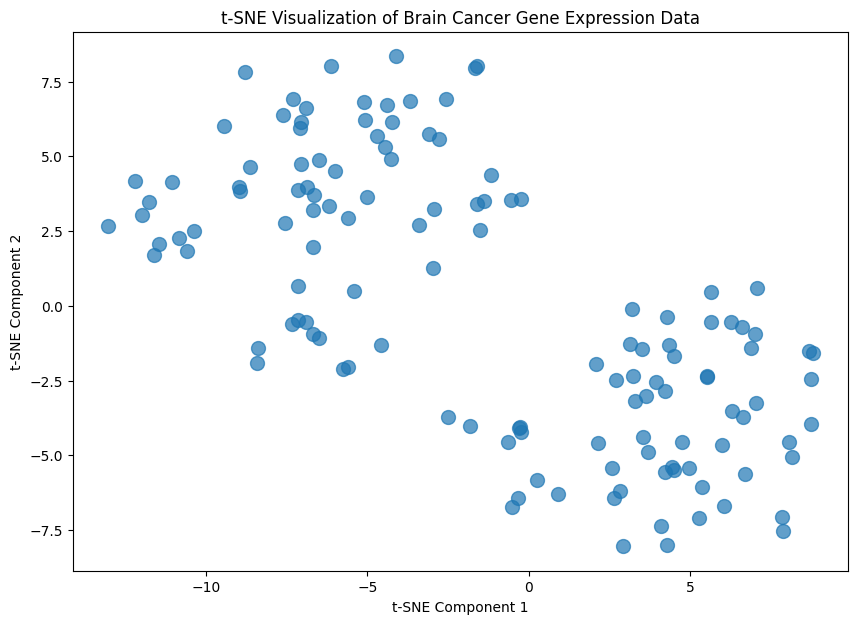

In [16]:
# Visualization
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=100, alpha=0.7)
plt.title("t-SNE Visualization of Brain Cancer Gene Expression Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

###The t-SNE visualization shows how the high-dimensional gene expression data for brain cancer samples has been reduced into two components, making it easier to identify patterns or clusters.

##Interpretation of the Visualization:
###1. Clusters Formation:

* The points (representing samples) are grouped into distinct clusters in the 2D space.
* The presence of clear clusters suggests that there are meaningful differences in gene expression between certain groups of samples, potentially corresponding to different subtypes of brain cancer or differences between healthy and diseased samples.

###2. Spatial Separation:

* The separation between clusters indicates that the t-SNE algorithm has successfully identified underlying structure within the dataset.
* Each cluster likely represents a group of samples with similar gene expression profiles, which could correspond to specific biological states or conditions.

###3. Densely Populated Areas:

* The areas with densely packed points show where samples are more similar to each other, implying a higher degree of similarity in gene expression patterns within those regions.

##Summary of the t-SNE Model:
* Dimensionality Reduction: t-SNE is a non-linear technique that is particularly useful for visualizing high-dimensional data. It projects complex data into a low-dimensional space (here, 2D), where the distances between points reflect their similarities in the original high-dimensional space.

* Visual Insights: The visualization reveals distinct clusters, offering insights into the gene expression profiles of brain cancer samples. The pattern observed can be used for further biological interpretation or as a foundation for classification tasks.

###In conclusion, the t-SNE plot demonstrates the utility of dimensionality reduction in uncovering hidden structures in gene expression data, facilitating a deeper understanding of the biological differences between samples in brain cancer research.